# Begin Original Model

In [1]:
##This will be the original model, using OLS

## Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.read_csv("churn_clean.csv", usecols=[15,16,19,20,25,39], names=['Age','Income','Churn','Outage','Contract','Tenure'], skiprows = [0])
df['Contract'].replace({'Month-to-month':0,'One year':1,'Two Year':2},inplace = True)
df['Churn'].replace({'No':0,'Yes':1},inplace = True)
#df['Churn'].value_counts()
#df.groupby('Churn').mean()


###########################################################BEGIN REDUCED MODEL CODE
##Create the X and Y Datasets
##Remove the Tenure and Bandwidth datapoints
#df = df.drop(['Outage','Income'],axis = 1)

#df.to_csv('D208_task2_Data.csv')
O_X = df.drop('Churn', axis =1)
O_Y = df[['Churn']]

# Split X and y into X_
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(O_X, O_Y, test_size=0.25, random_state=0)

# create a Linear Regression model object
lr = LogisticRegression(solver='lbfgs')

# pass through the X_train & y_train data set
lr.fit(X_train, y_train.values.ravel())

# Returns a NumPy Array

y_pred = lr.predict(X_test)




Xc = sm.add_constant(O_X)
logistic_regression = sm.Logit(O_Y,Xc)
fitted_model = logistic_regression.fit()
fitted_model.summary()




C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.401385
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Aug 2021   Pseudo R-squ.:                  0.3058
Time:                        18:25:25   Log-Likelihood:                -4013.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9501      0.133      7.162      0.000       0.690       1.210
Age            0.0015      0.001      1.080      0.280      -0.001       0.004
Income      5.893e-07   9.83e-07      0.599      0.549   -1.34e-06    2.52e-06
Outage         0.0037      0.009      0.398      0.691      -0.015       0.022
Contract      -1.0149      0.038    -26.568      0.000      -1.090      -0.940
Tenure        -0.0598      0.001    -41.707      0.000      -0.063      -0.057
==============================================================================
"""

Score of Prediction:
0.8125333333333333


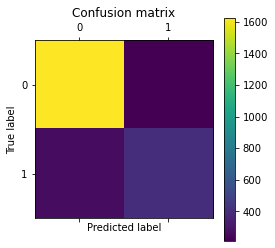

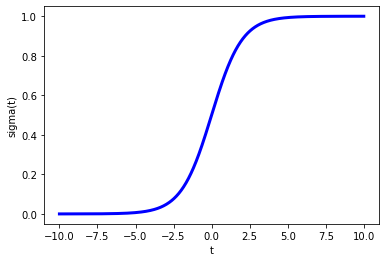

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1840
           1       0.65      0.60      0.63       660

    accuracy                           0.81      2500
   macro avg       0.76      0.74      0.75      2500
weighted avg       0.81      0.81      0.81      2500

Accuracy: 0.8104
Precision: 0.6519607843137255
Recall: 0.6045454545454545


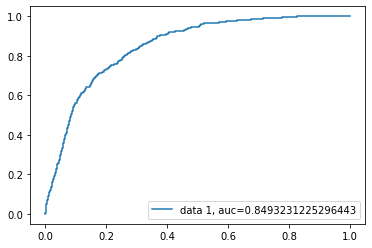

In [2]:
# Predict for One Observation (image)
score = lr.score(X_train,y_train)
print("Score of Prediction:")
print(score)


#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()
print(classification_report(y_test, lr.predict(X_test)))


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))




y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Begin the Reduced Model

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


df = pd.read_csv("churn_clean.csv", usecols=[15,16,19,20,25,39], names=['Age','Income','Churn','Outage','Contract','Tenure'], skiprows = [0])
df['Contract'].replace({'Month-to-month':0,'One year':1,'Two Year':2},inplace = True)
df['Churn'].replace({'No':0,'Yes':1},inplace = True)
#df['Churn'].value_counts()
#df.groupby('Churn').mean()


###########################################################BEGIN REDUCED MODEL CODE
##Create the X and Y Datasets
##Remove the Tenure and Bandwidth datapoints
df = df.drop(['Outage','Income'],axis = 1)

#df.to_csv('D208_task2_Data.csv')
R_X = df.drop('Churn', axis =1)
R_Y = df[['Churn']]

# Split X and y into X_
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(R_X, R_Y, test_size=0.25, random_state=0)

# create a Linear Regression model object
lr = LogisticRegression(solver=' ')

# pass through the X_train & y_train data set
lr.fit(X_train, y_train.values.ravel())

# Returns a NumPy Array

y_pred = lr.predict(X_test)


Xc = sm.add_constant(R_X)
logistic_regression = sm.Logit(R_Y,Xc)
fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.401410
         Iterations 7


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Aug 2021   Pseudo R-squ.:                  0.3058
Time:                        18:25:26   Log-Likelihood:                -4014.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0116      0.084     12.054      0.000       0.847       1.176
Age            0.0014      0.001      1.065      0.287      -0.001       0.004
Contract      -1.0149      0.038    -26.572      0.000      -1.090      -0.940
Tenure        -0.0597      0.001    -41.708      0.000      -0.063      -0.057
==============================================================================
"""

Score of Prediction:
0.8168


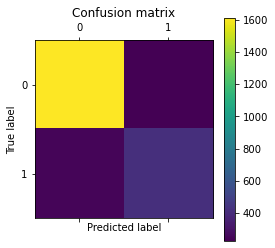

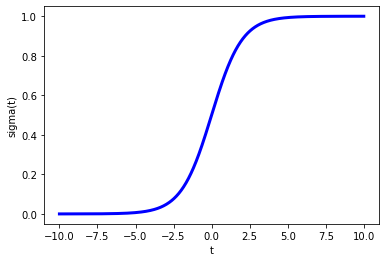

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1840
           1       0.65      0.63      0.64       660

    accuracy                           0.81      2500
   macro avg       0.76      0.75      0.76      2500
weighted avg       0.81      0.81      0.81      2500

Accuracy: 0.8116
Precision: 0.6469673405909798
Recall: 0.6303030303030303


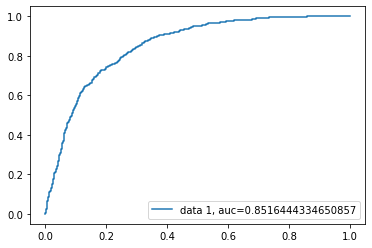

In [4]:
score = lr.score(X_train,y_train)
print("Score of Prediction:")
print(score)


#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')

plt.show()





print(classification_report(y_test, lr.predict(X_test)))



print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()